In [35]:
import pandas as pd

df = pd.read_csv('/Users/giovanni-lunetta/stat_3255/stat_3255_final/data/cleaned.csv')

In [36]:
df['Location Type'].value_counts()

street/sidewalk                         65192
residential building                    64106
other                                   29628
residential building/house              22045
street                                  19984
                                        ...  
parking lot                                 1
other (explain in complaint details)        1
street fair vendor                          1
cafeteria - public school                   1
school safety zone                          1
Name: Location Type, Length: 90, dtype: int64

In [37]:
df['Location Type'].value_counts()

counts2 = df['Location Type'].value_counts()
to_remove2 = counts2[counts2 < 10].index
df = df[~df['Location Type'].isin(to_remove2)]

In [38]:
df = df.dropna()

In [39]:
df.drop(['duration_days', 'duration_seconds', 'duration', 'Longitude', 'Latitude', 'Park Facility Name', 'Open Data Channel Type', 'Agency', 'Closed Date'], axis=1, inplace=True)

In [41]:
df.dtypes

Created Date                       object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Address Type                       object
City                               object
Resolution Description             object
Resolution Action Updated Date     object
Borough                            object
Police Precincts                  float64
duration_hours                    float64
day_of_week                         int64
day_type                           object
housing_units                     float64
occupied_housing_units            float64
median_home_value                 float64
population                        float64
median_household_income           float64
population_density                float64
dtype: object

In [42]:
df['Location Type'].value_counts()

street/sidewalk                  61399
residential building             57024
residential building/house       21788
other                            20416
street                           15160
sidewalk                          8502
store/commercial                  2845
above address                     2558
club/bar/restaurant               1864
business                          1487
3+ family apt. building           1369
park                               724
1-2 family dwelling                545
3+ family apartment building       354
commercial building                328
yard                               306
park/playground                    272
taxi                               249
restaurant/bar/deli/bakery         201
3+ family mixed use building       166
house of worship                   133
curb                               111
gutter                             106
school                              85
1-2 family mixed use building       68
construction site        

In [8]:
# df.drop(['Created Date', 'Resolution Action Updated Date', 'Resolution Description'], axis=1, inplace=True)

In [43]:
df['Incident Zip'] = df['Incident Zip'].astype(str)
df['day_of_week'] = df['day_of_week'].astype(str)
df['day_type'] = df['day_type'].astype(str)

# df_cleaned.dtypes

df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Resolution Action Updated Date'] = pd.to_datetime(df['Resolution Action Updated Date'])

# Extract hour, day, and month from 'Created Date' column
df['Created Hour'] = df['Created Date'].dt.hour
df['Created Day'] = df['Created Date'].dt.day
df['Created Month'] = df['Created Date'].dt.month

# Extract hour, day, and month from 'Resolution Action Updated Date' column
df['Resolution Updated Hour'] = df['Resolution Action Updated Date'].dt.hour
df['Resolution Updated Day'] = df['Resolution Action Updated Date'].dt.day
df['Resolution Updated Month'] = df['Resolution Action Updated Date'].dt.month

df.drop(['Created Date', 'Resolution Action Updated Date'], axis=1, inplace=True)

In [45]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# select the variables to scale
variables_to_scale = ['housing_units', 'occupied_housing_units', 'median_home_value', 'population',
                      'median_household_income', 'population_density', 'Police Precincts', 'duration_hours', 'Created Day', 'Created Hour', 'Resolution Updated Hour', 'Resolution Updated Day']

# apply the scaler to the selected variables
df.loc[:, variables_to_scale] = scaler.fit_transform(df.loc[:, variables_to_scale])

In [46]:
df.dtypes

Complaint Type               object
Descriptor                   object
Location Type                object
Incident Zip                 object
Incident Address             object
Address Type                 object
City                         object
Resolution Description       object
Borough                      object
Police Precincts            float64
duration_hours              float64
day_of_week                  object
day_type                     object
housing_units               float64
occupied_housing_units      float64
median_home_value           float64
population                  float64
median_household_income     float64
population_density          float64
Created Hour                float64
Created Day                 float64
Created Month                 int64
Resolution Updated Hour     float64
Resolution Updated Day      float64
Resolution Updated Month      int64
dtype: object

In [47]:
df.drop(['Incident Zip', 'Incident Address'], axis=1, inplace=True)

In [48]:
df.drop(['Police Precincts', 'City'], axis=1, inplace=True)

In [50]:
# create a list of column names with object type
columns = ['Complaint Type', 'Descriptor', 'Location Type',
           'Address Type', 'Resolution Description', 'day_of_week', 'day_type']

# get dummies with one column removed
df = pd.get_dummies(df, columns=columns, drop_first=True)

In [51]:
df.shape

(198682, 1010)

In [52]:
df['Borough'].value_counts()

brooklyn         61438
bronx            45252
queens           44585
manhattan        38979
staten island     8428
Name: Borough, dtype: int64

In [53]:
# Define a dictionary to map borough names to numerical values
borough_dict = {'brooklyn': 0, 'bronx': 1, 'queens': 2, 'manhattan': 3, 'staten island': 4}

# Replace the string values with numerical values
df['Borough'] = df['Borough'].replace(borough_dict)

In [54]:
df_test = pd.read_csv("/Users/giovanni-lunetta/stat_3255/stat_3255_final/data/cleaned_test.csv")

In [20]:
df_test.shape

(93859, 859)

In [55]:
df.drop(['Created Hour', 'Created Day', 'Created Month',
       'Resolution Updated Hour', 'Resolution Updated Day',
       'Resolution Updated Month'], axis=1, inplace=True)

df_test.drop(['Created Hour', 'Created Day', 'Created Month',
       'Resolution Updated Hour', 'Resolution Updated Day',
       'Resolution Updated Month'], axis=1, inplace=True)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the cleaned data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(df.drop(['Borough'], axis=1), df['Borough'], test_size=0.2, random_state=42)
X_test = df_test.drop(['Borough'], axis=1)
y_test = df_test['Borough']

# Align the test data with the training data to add any missing columns
X_test_aligned, X_train_aligned = X_test.align(X_train, join='outer', axis=1, fill_value=0)
X_test = X_test_aligned.loc[:, X_train.columns]

In [17]:
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df.drop('Borough', axis=1), df['Borough'], test_size=0.2, random_state=42)

# # Split the training data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [57]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import regularizers
from sklearn.metrics import f1_score
import os
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=5, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=5, activation='softmax')
])

# Define optimizer with learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile model with optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/25
4968/4968 [==============================] - 10s 2ms/step - loss: 0.7169 - accuracy: 0.7893 - val_loss: 0.5521 - val_accuracy: 0.8553
Epoch 2/25
4968/4968 [==============================] - 6s 1ms/step - loss: 0.5145 - accuracy: 0.8697 - val_loss: 0.4695 - val_accuracy: 0.8894
Epoch 3/25
4968/4968 [==============================] - 6s 1ms/step - loss: 0.4463 - accuracy: 0.8901 - val_loss: 0.4187 - val_accuracy: 0.8997
Epoch 4/25
4968/4968 [==============================] - 6s 1ms/step - loss: 0.4047 - accuracy: 0.9030 - val_loss: 0.3816 - val_accuracy: 0.9218
Epoch 5/25
4968/4968 [==============================] - 7s 1ms/step - loss: 0.3710 - accuracy: 0.9250 - val_loss: 0.3508 - val_accuracy: 0.9342
Epoch 6/25
4968/4968 [==============================] - 6s 1ms/step - loss: 0.3502 - accuracy: 0.9312 - val_loss: 0.3397 - val_accuracy: 0.9316
Epoch 7/25
4968/4968 [==============================] - 7s 1ms/step - loss: 0.3353 - accuracy: 0.9334 - val_loss: 0.3265 - val_accuracy

In [58]:
# Evaluate model on test data
y_pred = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test, y_test)
f1 = f1_score(y_test, y_pred.argmax(axis=1), average='weighted')

# Print model performance metrics
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"F1 score: {f1:.4f}")

2934/2934 [==============================] - 3s 922us/step - loss: 0.2576 - accuracy: 0.9423
Test loss: 0.2576
Test accuracy: 0.9423
F1 score: 0.9427


2934/2934 [==============================] - 2s 753us/step


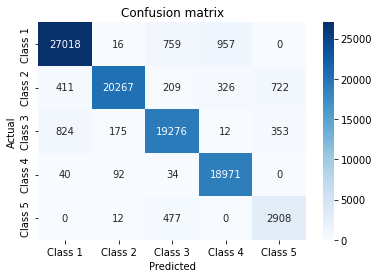

In [59]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use the model to predict the class of each test observation
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], yticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

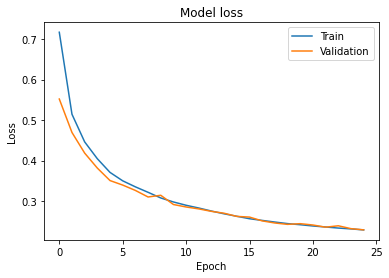

In [60]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


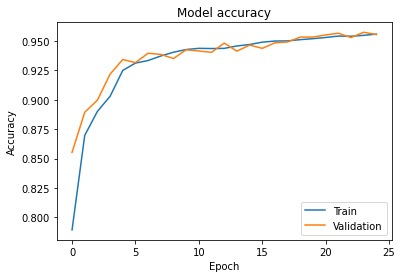

In [61]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

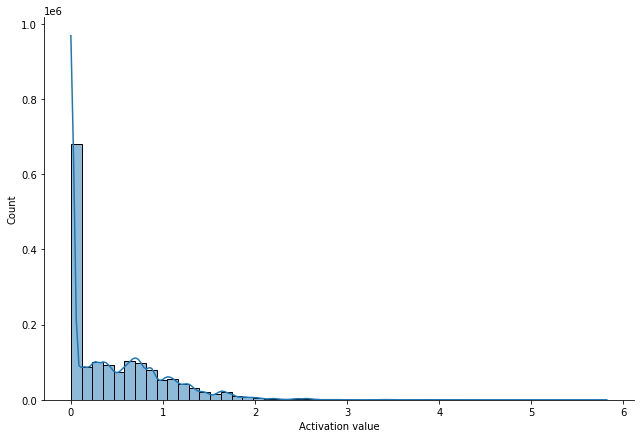

In [62]:
get_activations = tf.keras.backend.function([model.layers[0].input], [model.layers[0].output])

# Get the activations for the training set
activations = get_activations(X_train.values.reshape(-1, X_train.shape[1]))[0]

# Plot the distribution of the activations
import seaborn as sns

# Create a FacetGrid with the histogram
g = sns.displot(activations.flatten(), bins=50, kde=True, height=6, aspect=1.5)

# Set the label of the x-axis
g.set_axis_labels("Activation value", "Count")

# Show the plot
plt.show()

In [63]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a dataframe with feature importances and predictor names
importances_df = pd.DataFrame({'Predictor': X_train.columns, 'Importance': importances})

# Sort the dataframe by importance in descending order
importances_df = importances_df.sort_values('Importance', ascending=False)

# Print the top 10 predictors by importance
print(importances_df.head(10))

                    Predictor  Importance
6          population_density    0.314059
3           median_home_value    0.234184
5     median_household_income    0.164828
4                  population    0.118298
1               housing_units    0.114010
2      occupied_housing_units    0.053489
0              duration_hours    0.000498
1002         day_type_weekend    0.000061
999             day_of_week_4    0.000048
998             day_of_week_3    0.000042
